<a href="https://colab.research.google.com/github/rkanejac/Data110/blob/main/RalinkaeWeek5HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Load the Dataset

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


titan=pd.read_csv('https://raw.githubusercontent.com/Reben80/Data110-32213/main/dataset/titanic.csv')
titantic = pd.DataFrame(titan)
titantic.head(10)




,class,age,sex,survived
0,1st,29.00,female,survived
1,1st,2.00,female,died
2,1st,30.00,male,died
3,1st,25.00,female,died
4,1st,0.92,male,survived
5,1st,47.00,male,survived
6,1st,63.00,female,survived
7,1st,39.00,male,died
8,1st,58.00,female,survived
9,1st,71.00,male,died


## 2. Exploratory Data Analysis (EDA)

In [81]:
# Calculate and compare the overall survival rate to the survival rates by gender.
overall_survive_count = titantic['survived'].value_counts()['survived']
overall_death_count = titantic['survived'].value_counts()['died']
women = titantic[titantic['sex'] == 'female']
men = titantic[titantic['sex'] == 'male']
women_survive_count = women['survived'].value_counts()['survived']
men_survive_count = men['survived'].value_counts()['survived']
female_survival_rate = round(women_survive_count/overall_survive_count, 2)
male_survived_rate = round(men_survive_count/overall_survive_count, 2)

print("The female survival rate",female_survival_rate)
print("The male survival rate", male_survived_rate)



The female survival rate 0.69
The male survival rate 0.31


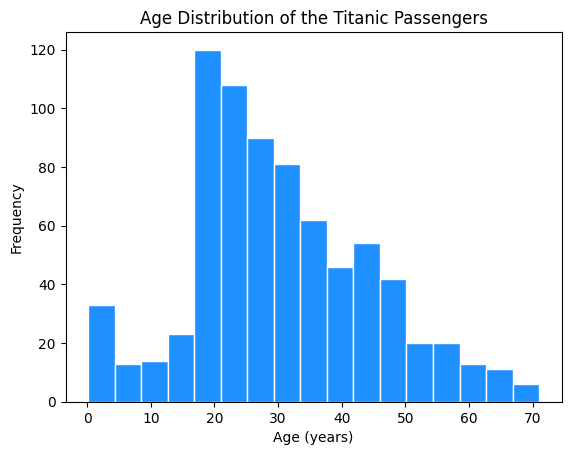

In [82]:
#Explore the age distribution of the dataset
plt.hist(titantic['age'], bins = 17, color='dodgerblue', edgecolor='white')
plt.title('Age Distribution of the Titanic Passengers')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.show()

In [83]:
#Analyze survival rates by passenger class
firstclass = titantic[titantic['class'] =='1st']
secondclass = titantic[titantic['class']=='2nd']
thirdclass = titantic[titantic['class']=='3rd']

firstclass_survived = firstclass['survived'].value_counts()['survived']
secondclass_survived = secondclass['survived'].value_counts()['survived']
thirdclass_survived = thirdclass['survived'].value_counts()['survived']

firstclass_survival_rate = round(firstclass_survived/overall_survive_count, 2)
print("The First Class survival rate is",firstclass_survival_rate)

secondclass_survival_rate = round(secondclass_survived/overall_survive_count, 2)
print("The Second Class survival rate is",secondclass_survival_rate)

thirdclass_survival_rate = round(thirdclass_survived/overall_survive_count, 2)
print("The Third Class survival rate is",thirdclass_survival_rate)


The First Class survival rate is 0.44
The Second Class survival rate is 0.31
The Third Class survival rate is 0.25


## 3. Visualizing Age Distribution by Survival Status

### 3.1 Histrogram for Age Distribution

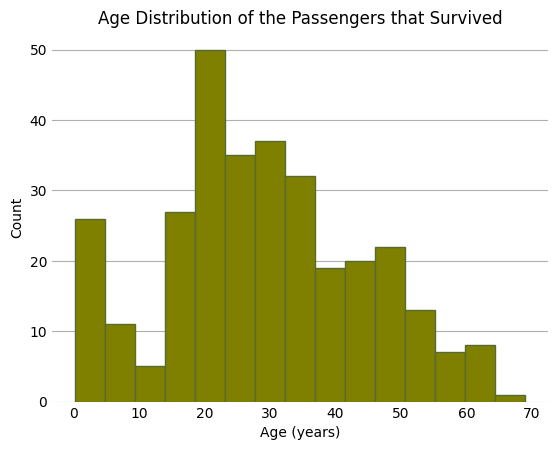

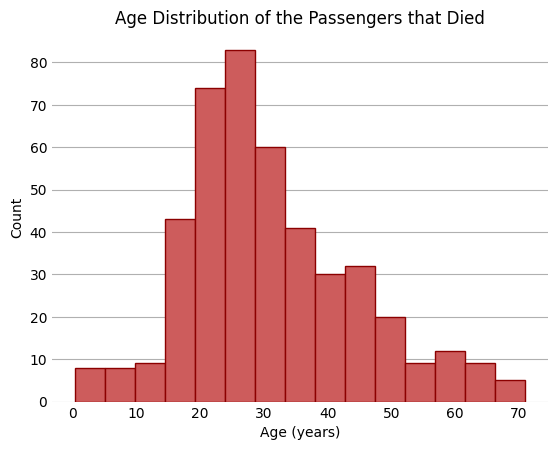

In [84]:
survive = titantic[titantic['survived'] == 'survived']
notsurvived = titantic[titantic['survived'] == 'died']

plt.figure(1)
plt.title('Age Distribution of the Passengers that Survived')
plt.hist(survive['age'], bins=15, color='olive', edgecolor = 'darkolivegreen')
plt.grid(axis='y')
ax = plt.gca()
ax.set_axisbelow(True)
plt.xlabel('Age (years)')
plt.ylabel('Count')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='both', which='both', length=0)

print('\n')

plt.figure(2)
plt.title('Age Distribution of the Passengers that Died')
plt.hist(notsurvived['age'], bins=15, color='indianred', edgecolor = 'darkred')
plt.grid(axis='y')
ax = plt.gca()
ax.set_axisbelow(True)
plt.xlabel('Age (years)')
plt.ylabel('Count')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='both', which='both', length=0)
plt.show()

### 3.2 Pyramid-style Age Distribution

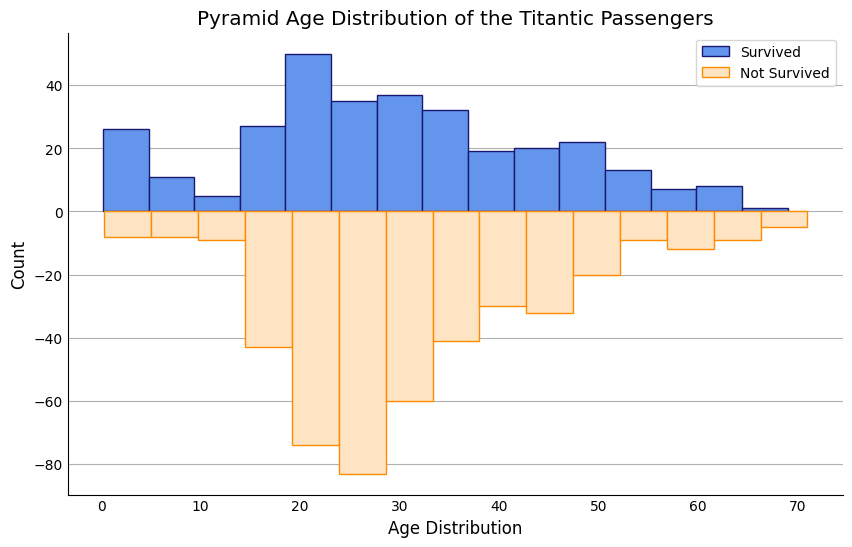

In [85]:
plt.figure(figsize=(10,6))
plt.hist(survive['age'], bins=15, label='Survived', color='cornflowerblue', edgecolor='midnightblue')
plt.hist(notsurvived['age'], bins=15, label='Not Survived', color='bisque', edgecolor='darkorange', weights=[-1]*len(notsurvived['age']))
plt.legend()
plt.grid(axis='y')
ax = plt.gca()
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Pyramid Age Distribution of the Titantic Passengers', fontsize='x-large')
plt.xlabel('Age Distribution', fontsize='large')
plt.ylabel('Count', fontsize='large')

ax.tick_params(axis='both', which='both', length=0)

plt.show()

### 3.3 KDE Plots for Survival by Age (male, female, total)

<Figure size 640x480 with 0 Axes>

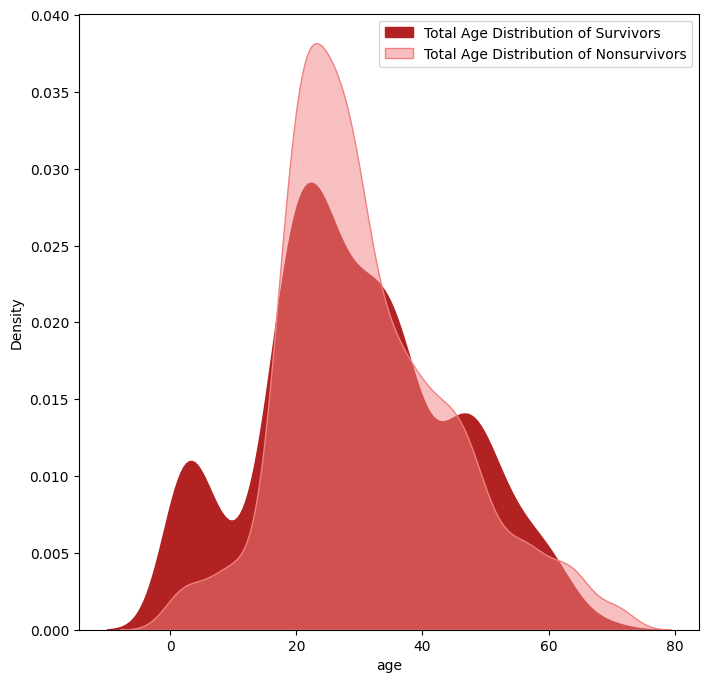

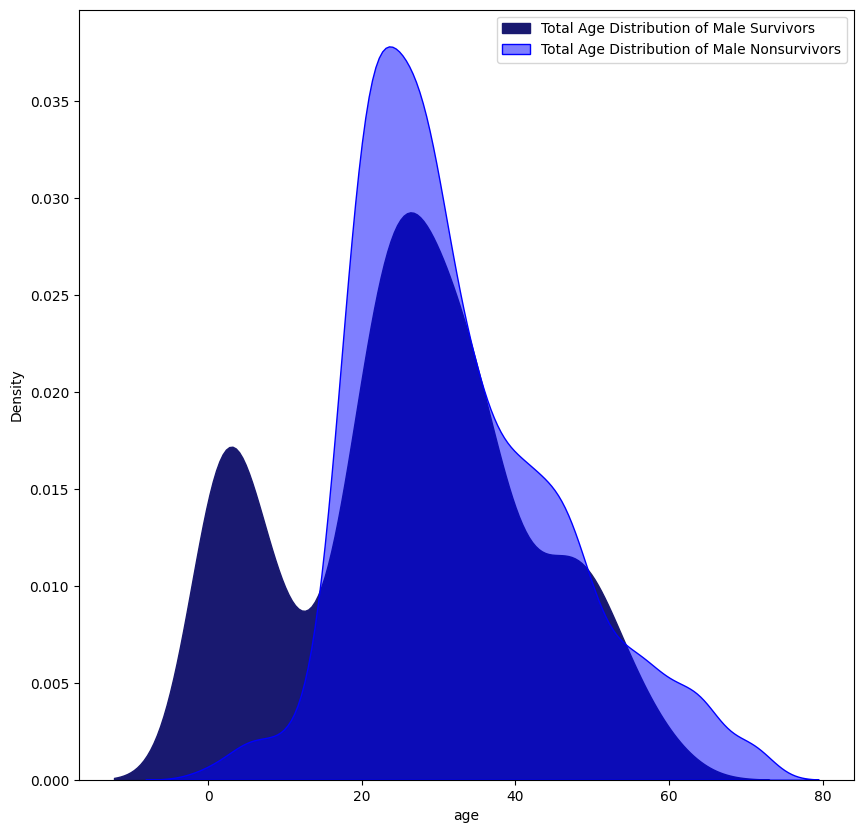

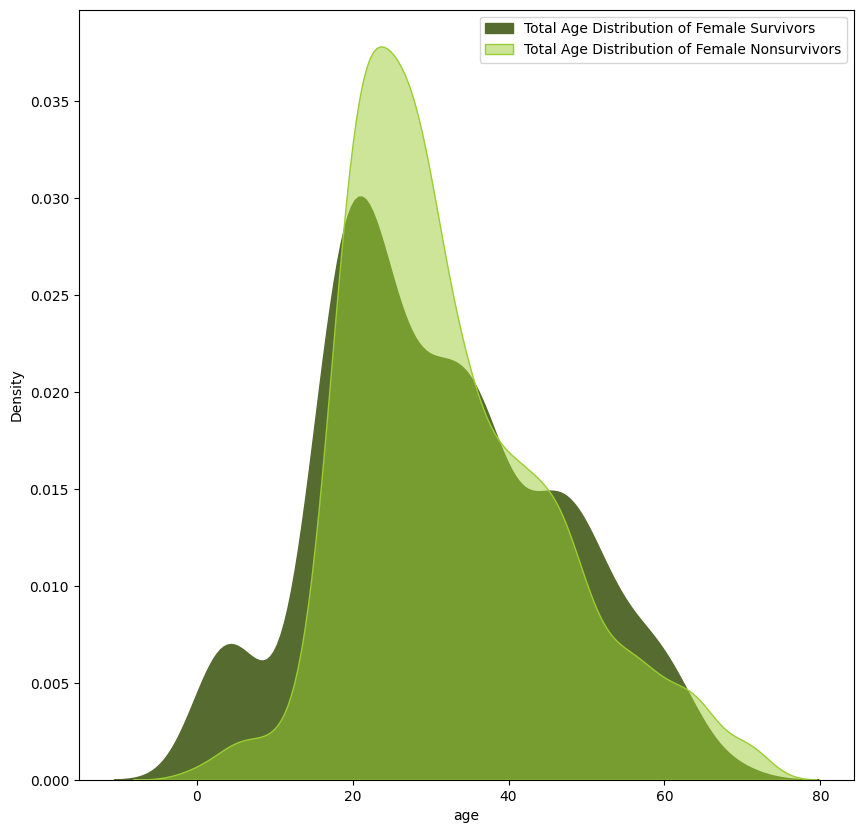

In [96]:
plt.figure(1)
plt.figure(figsize=(8,8))
sns.kdeplot(survive['age'], bw_adjust=0.7, fill=True, color='firebrick', label='Total Age Distribution of Survivors', alpha=1)
sns.kdeplot(notsurvived['age'], bw_adjust=0.7, fill=True, color='lightcoral', label='Total Age Distribution of Nonsurvivors', alpha=0.5 )
plt.legend()

plt.figure(2)
plt.figure(figsize=(10,10))
sns.kdeplot(survive[survive['sex'] == 'male']['age'], bw_adjust=0.7, fill=True, color='midnightblue', label='Total Age Distribution of Male Survivors', alpha=1)
sns.kdeplot(notsurvived[notsurvived['sex']== 'male']['age'], bw_adjust=0.7, fill=True, color='blue', label='Total Age Distribution of Male Nonsurvivors', alpha=0.5)
plt.legend()

plt.figure(3)
plt.figure(figsize=(10,10))
sns.kdeplot(survive[survive['sex'] == 'female']['age'], bw_adjust=0.7, fill=True, color='darkolivegreen', label='Total Age Distribution of Female Survivors', alpha=1)
sns.kdeplot(notsurvived[notsurvived['sex']== 'male']['age'], bw_adjust=0.7, fill=True, color='yellowgreen', label='Total Age Distribution of Female Nonsurvivors', alpha=0.5)
plt.legend()


## 4. Bar Graphs for Passenger Class

### 4.1 Bar Graph of Passenger Class

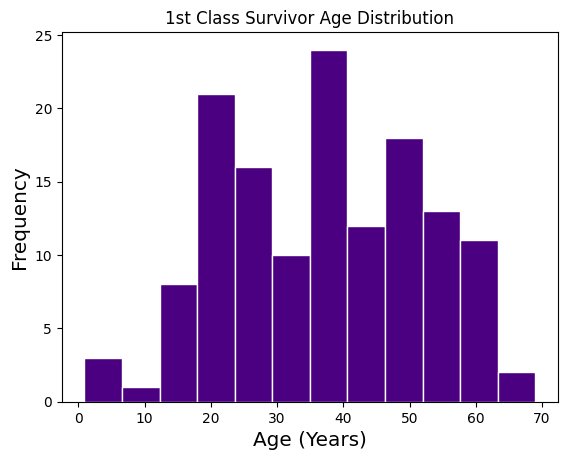

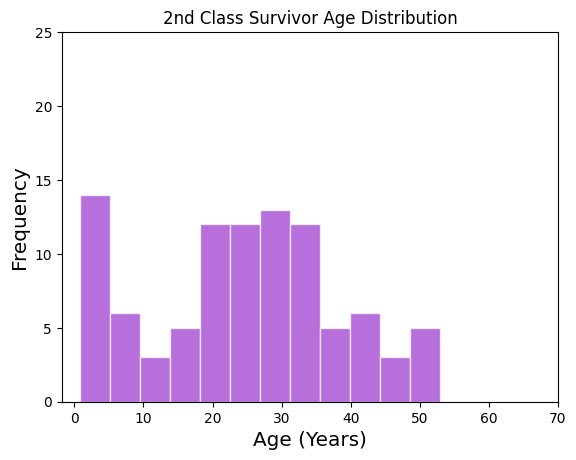

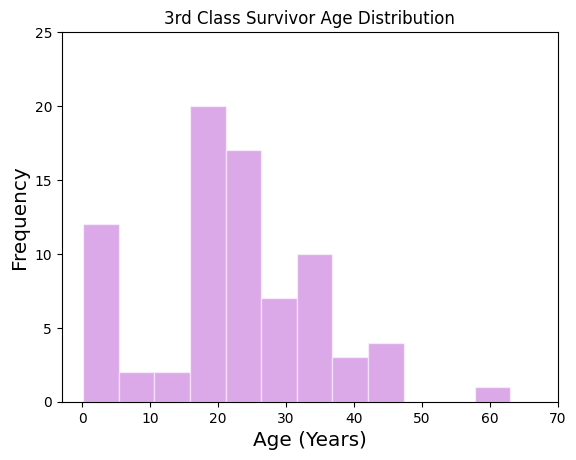

In [87]:
plt.figure()
plt.hist(survive[survive['class'] == '1st']['age'], bins=12,color = 'indigo', edgecolor = 'white', alpha=1)
plt.title('1st Class Survivor Age Distribution')
plt.xlabel('Age (Years)', fontsize='x-large')
plt.ylabel('Frequency', fontsize='x-large')

plt.figure()
plt.hist(survive[survive['class'] == '2nd']['age'], bins=12, color = 'darkorchid', edgecolor = 'white', alpha=0.7)
plt.xticks(np.arange(0, 80, step=10))
plt.yticks(np.arange(0, 30, step=5))
plt.title('2nd Class Survivor Age Distribution')
plt.xlabel('Age (Years)', fontsize='x-large')
plt.ylabel('Frequency', fontsize='x-large')

plt.figure()
plt.hist(survive[survive['class'] == '3rd']['age'], bins=12, color = 'mediumorchid', edgecolor = 'white', alpha=0.5)
plt.xticks(np.arange(0, 80, step=10),)
plt.yticks(np.arange(0, 30, step=5))
plt.title('3rd Class Survivor Age Distribution')
plt.xlabel('Age (Years)', fontsize='x-large')
plt.ylabel('Frequency', fontsize='x-large')
plt.show()


### 4.2 Bar Graph of Death by Class

87
240


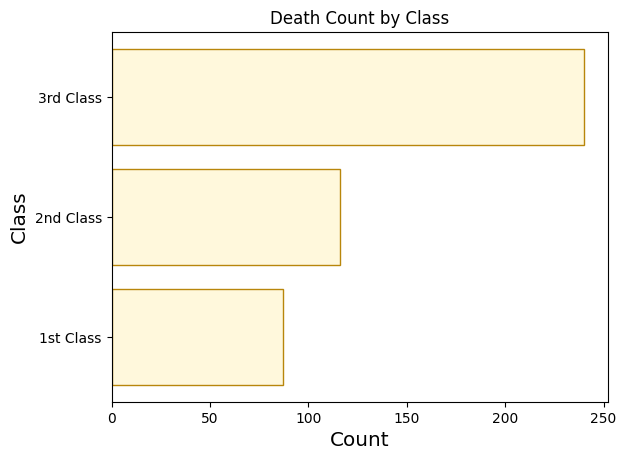

In [97]:
firstclassdeath = notsurvived['class'].value_counts()['1st']
secondclassdeath = notsurvived['class'].value_counts()['2nd']
thirdclassdeath = notsurvived['class'].value_counts()['3rd']

print(firstclassdeath)
print(thirdclassdeath)


x = ['1st Class', '2nd Class', '3rd Class']
y = [firstclassdeath, secondclassdeath, thirdclassdeath]

plt.barh(x,y, color = 'cornsilk', edgecolor = 'darkgoldenrod')
plt.title('Death Count by Class')
plt.xlabel('Count', fontsize='x-large')
plt.ylabel('Class', fontsize='x-large')
plt.show()

## Conclusion

Based on my analysis, I determined that a passenger's sex and socioeconomic status greatly impact their chances of survival. For the sample data provided, the survival rate for female passengers is 69%, while the survival rate for male passengers is 31%. This means that a female passenger is twice as likely to survive than a male passenger. I also noticed that the number of third class passenger deaths is almost 2.75 times higher than the number of first-class passenger deaths.